3.8 Expectation, Variance and Covariance                                                                                
3.9 Common Probability Distribution

In [1]:
import numpy as np
import sympy as sym
from IPython.display import Latex
from numpy import linspace
import matplotlib.pyplot as plt

In [2]:
def expected_value_uniform(rand_var, prob_mass_func):
    return np.dot(rand_var.T, prob_mass_func(rand_var))

In [3]:
def variance_uniform(rand_var, prob_mass_func):
    return expected_value_uniform(rand_var**2, prob_mass_func) -expected_value_uniform(rand_var, prob_mass_func)**2

In [4]:
def variance_uniform_def(rand_var, prob_mass_func):
    return expected_value_uniform((rand_var - expected_value_uniform(rand_var, prob_mass_func))**2, prob_mass_func)

In [5]:
def uniform_dist(x):
    return [1/len(x)]*len(x)

In [6]:
def covariance_uniform(rand_x, rand_y, prob_mass_func):
    return 1/2*(variance_uniform(rand_x + rand_y, prob_mass_func) - variance_uniform(rand_x, prob_mass_func) - variance_uniform(rand_y, prob_mass_func))

In [7]:
def covariance_uniform_def(rand_x, rand_y, prob_mass_func):
    return expected_value_uniform((rand_x - expected_value_uniform(rand_x, prob_mass_func))*(rand_y - expected_value_uniform(rand_y, prob_mass_func)), prob_mass_func)

In [8]:
def correlation_uniform(rand_x, rand_y, prob_mass_func):
    cov = expected_value_uniform((rand_x - expected_value_uniform(rand_x, prob_mass_func))*(rand_y - expected_value_uniform(rand_y, prob_mass_func)), prob_mass_func)
    return cov/np.sqrt(variance_uniform(rand_x, prob_mass_func)*variance_uniform(rand_y, prob_mass_func))

In [9]:
rand_x = np.array(list(set([np.random.randint(0, 9) for i in range(5)])))
rand_y = np.array(list(set([np.random.randint(0, 9) for i in range(5)])))

In [10]:
rand_x, rand_y

(array([0, 2, 3, 7]), array([0, 2, 3, 6]))

In [11]:
expected_value_uniform(rand_x, uniform_dist)

3.0

In [12]:
variance_uniform(rand_x, uniform_dist)

6.5

In [13]:
variance_uniform(rand_y, uniform_dist)

4.6875

In [14]:
variance_uniform_def(rand_y, uniform_dist)

4.6875

In [15]:
variance_uniform_def(rand_x, uniform_dist)

6.5

In [16]:
covariance_uniform(rand_x, rand_x, uniform_dist)

6.5

In [17]:
covariance_uniform(rand_y, rand_y, uniform_dist)

4.6875

In [18]:
covariance_uniform(rand_x, rand_y, uniform_dist)

5.5

In [19]:
covariance_uniform_def(rand_x, rand_y, uniform_dist)

5.5

In [20]:
correlation_uniform(rand_x, rand_y, uniform_dist)

0.9964037900472443

In [21]:
# from https://brianzhang01.github.io/2018/04/distributions-with-sympy/

mu = sym.symbols('mu', real=True)
x = sym.symbols('x', real=True)
sigma, a, b, lamb = sym.symbols('sigma a b lambda', positive=True)
normal = (2*sym.pi*sigma**2) ** sym.Rational(-1, 2) * sym.exp(-(x-mu)**2/(2*sigma**2))

In [22]:
def print_formula(form):
    display(Latex("$${}$$".format(sym.latex(form))))

In [23]:
print("Normal Distribution")
print_formula(normal)

Normal Distribution


<IPython.core.display.Latex object>

In [24]:
def plot_func(pdf, ylabel, left_bound=-20, right_bound=20):
    lam_x = sym.lambdify(x, pdf, modules=['numpy'])

    x_vals = linspace(left_bound, right_bound, 1000)
    y_vals = lam_x(x_vals)

    plt.plot(x_vals, y_vals)
    plt.ylabel(ylabel)
    plt.xlabel("x")
    plt.show()

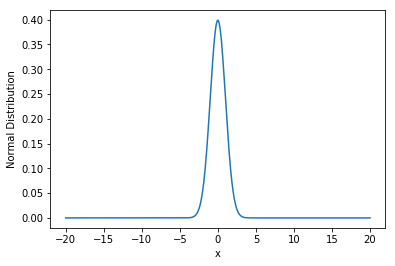

In [25]:
plot_func(normal.subs({mu :0, sigma: 1}), 'Normal Distribution')

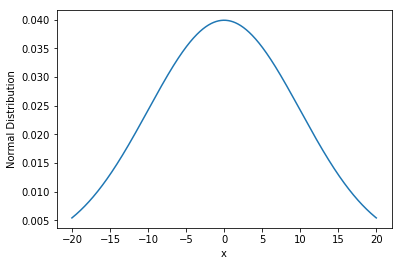

In [26]:
plot_func(normal.subs({mu :0, sigma: 10}), 'Normal Distribution')

In [27]:
def area(form):
    '''
    Should be 1 for all PDFs
    '''
    return sym.simplify(sym.integrate(form, (x, -sym.oo, sym.oo)))

In [28]:
def exp_value(form):
    return sym.simplify(sym.integrate(form*x, (x, -sym.oo, sym.oo)))

In [29]:
def variance(form):
    ex2 = sym.simplify(sym.integrate((x**2)*form, (x, -sym.oo, sym.oo)))
    ex_sqr = exp_value(form)**2
    return ex2 - ex_sqr

In [30]:
area_norm = area(normal)
display(Latex("$${} = {}$$".format(sym.latex(sym.Integral(normal, (x, -sym.oo, sym.oo))), sym.latex(area_norm))))

<IPython.core.display.Latex object>

In [31]:
ex_norm = exp_value(normal)
print('Expected value:')
display(Latex("$${} = {}$$".format(sym.latex(sym.Integral(normal*x, (x, -sym.oo, sym.oo))), sym.latex(ex_norm))))

Expected value:


<IPython.core.display.Latex object>

In [32]:
ex_norm_0 = exp_value(normal.subs({mu:0}))
print('Expected value:')
display(Latex("$${} = {}$$".format(sym.latex(sym.Integral(normal*x, (x, -sym.oo, sym.oo))), sym.latex(ex_norm_0))))

Expected value:


<IPython.core.display.Latex object>

In [33]:
var_nor = variance(normal)
print('Variance:')
display(Latex("$${} = {}$$".format(sym.latex(sym.symbols('E(x-Ex)', positive=True)**2), sym.latex(var_nor))))

Variance:


<IPython.core.display.Latex object>

In [34]:
expo = sym.Piecewise(
    (0, x < 0),
    (lamb * sym.exp(-lamb*x), True)
)

In [35]:
print("Exponential Distribution")
print_formula(expo)

Exponential Distribution


<IPython.core.display.Latex object>

In [36]:
area_exp = area(expo)
display(Latex("$${} = {}$$".format(sym.latex(sym.Integral(expo.args[1][0], (x, -sym.oo, sym.oo))), sym.latex(area_exp))))

<IPython.core.display.Latex object>

In [37]:
ex_exp = exp_value(expo)
print("Expected Value")
display(Latex("$${} = {}$$".format(sym.latex(sym.Integral(expo.args[1][0]*x, (x, -sym.oo, sym.oo))), sym.latex(ex_exp))))

Expected Value


<IPython.core.display.Latex object>

In [38]:
var_exp = variance(expo)
print('Variance:')
display(Latex("$${} = {}$$".format(sym.latex(sym.symbols('E(x-Ex)', positive=True)**2), sym.latex(var_exp))))

Variance:


<IPython.core.display.Latex object>

In [39]:
expo.subs({lamb :1})

Piecewise((0, x < 0), (exp(-x), True))

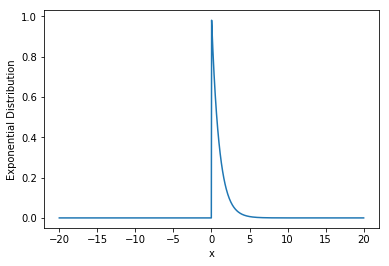

In [40]:
plot_func(expo.subs({lamb :1}), 'Exponential Distribution')

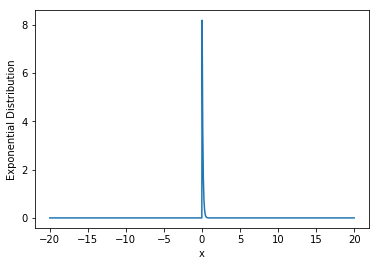

In [41]:
plot_func(expo.subs({lamb :10}), 'Exponential Distribution')

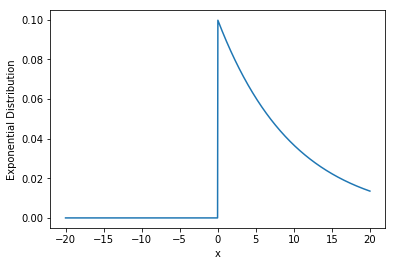

In [42]:
plot_func(expo.subs({lamb :0.1}), 'Exponential Distribution')

3.10 Useful Properties of Common Functions

In [59]:
sigma = sym.symbols('sigma', real=True)
sigmoid = 1/(1+sym.exp(-x))

softplus = sym.log(1+sym.exp(x))

reLu = sym.Piecewise(
    (0, x < 0),
    (x, True)
)

In [60]:
print_formula(sigmoid)

<IPython.core.display.Latex object>

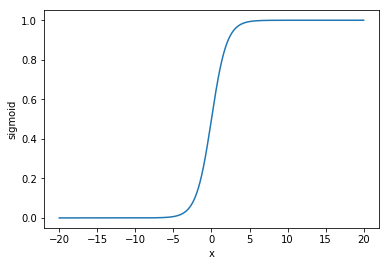

In [61]:
plot_func(sigmoid, 'sigmoid')

In [62]:
print_formula(softplus)

<IPython.core.display.Latex object>

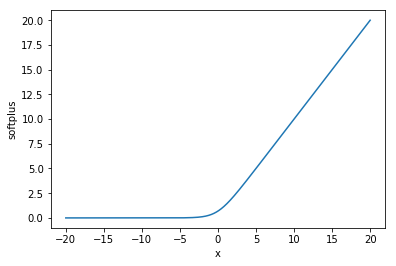

In [65]:
plot_func(softplus, 'softplus')

In [64]:
print_formula(reLu)

<IPython.core.display.Latex object>

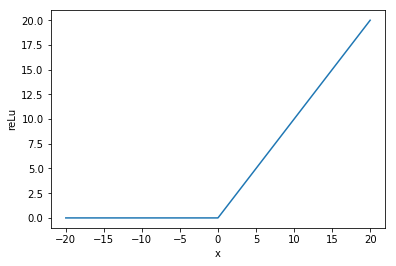

In [66]:
plot_func(reLu, 'reLu')

In [86]:
derivative_of = sym.diff(softplus, x)

In [88]:
print_formula(derivative_of) # the same sigmoid

<IPython.core.display.Latex object>